In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


import statsmodels
import statsmodels.api as sm
import sklearn

### Data Overview

In [3]:
# Read the given CSV file, and view some sample records

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike = bike.drop(['instant'], axis=1)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.isnull().sum()    # Missing value check

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Step 1: Visualization 

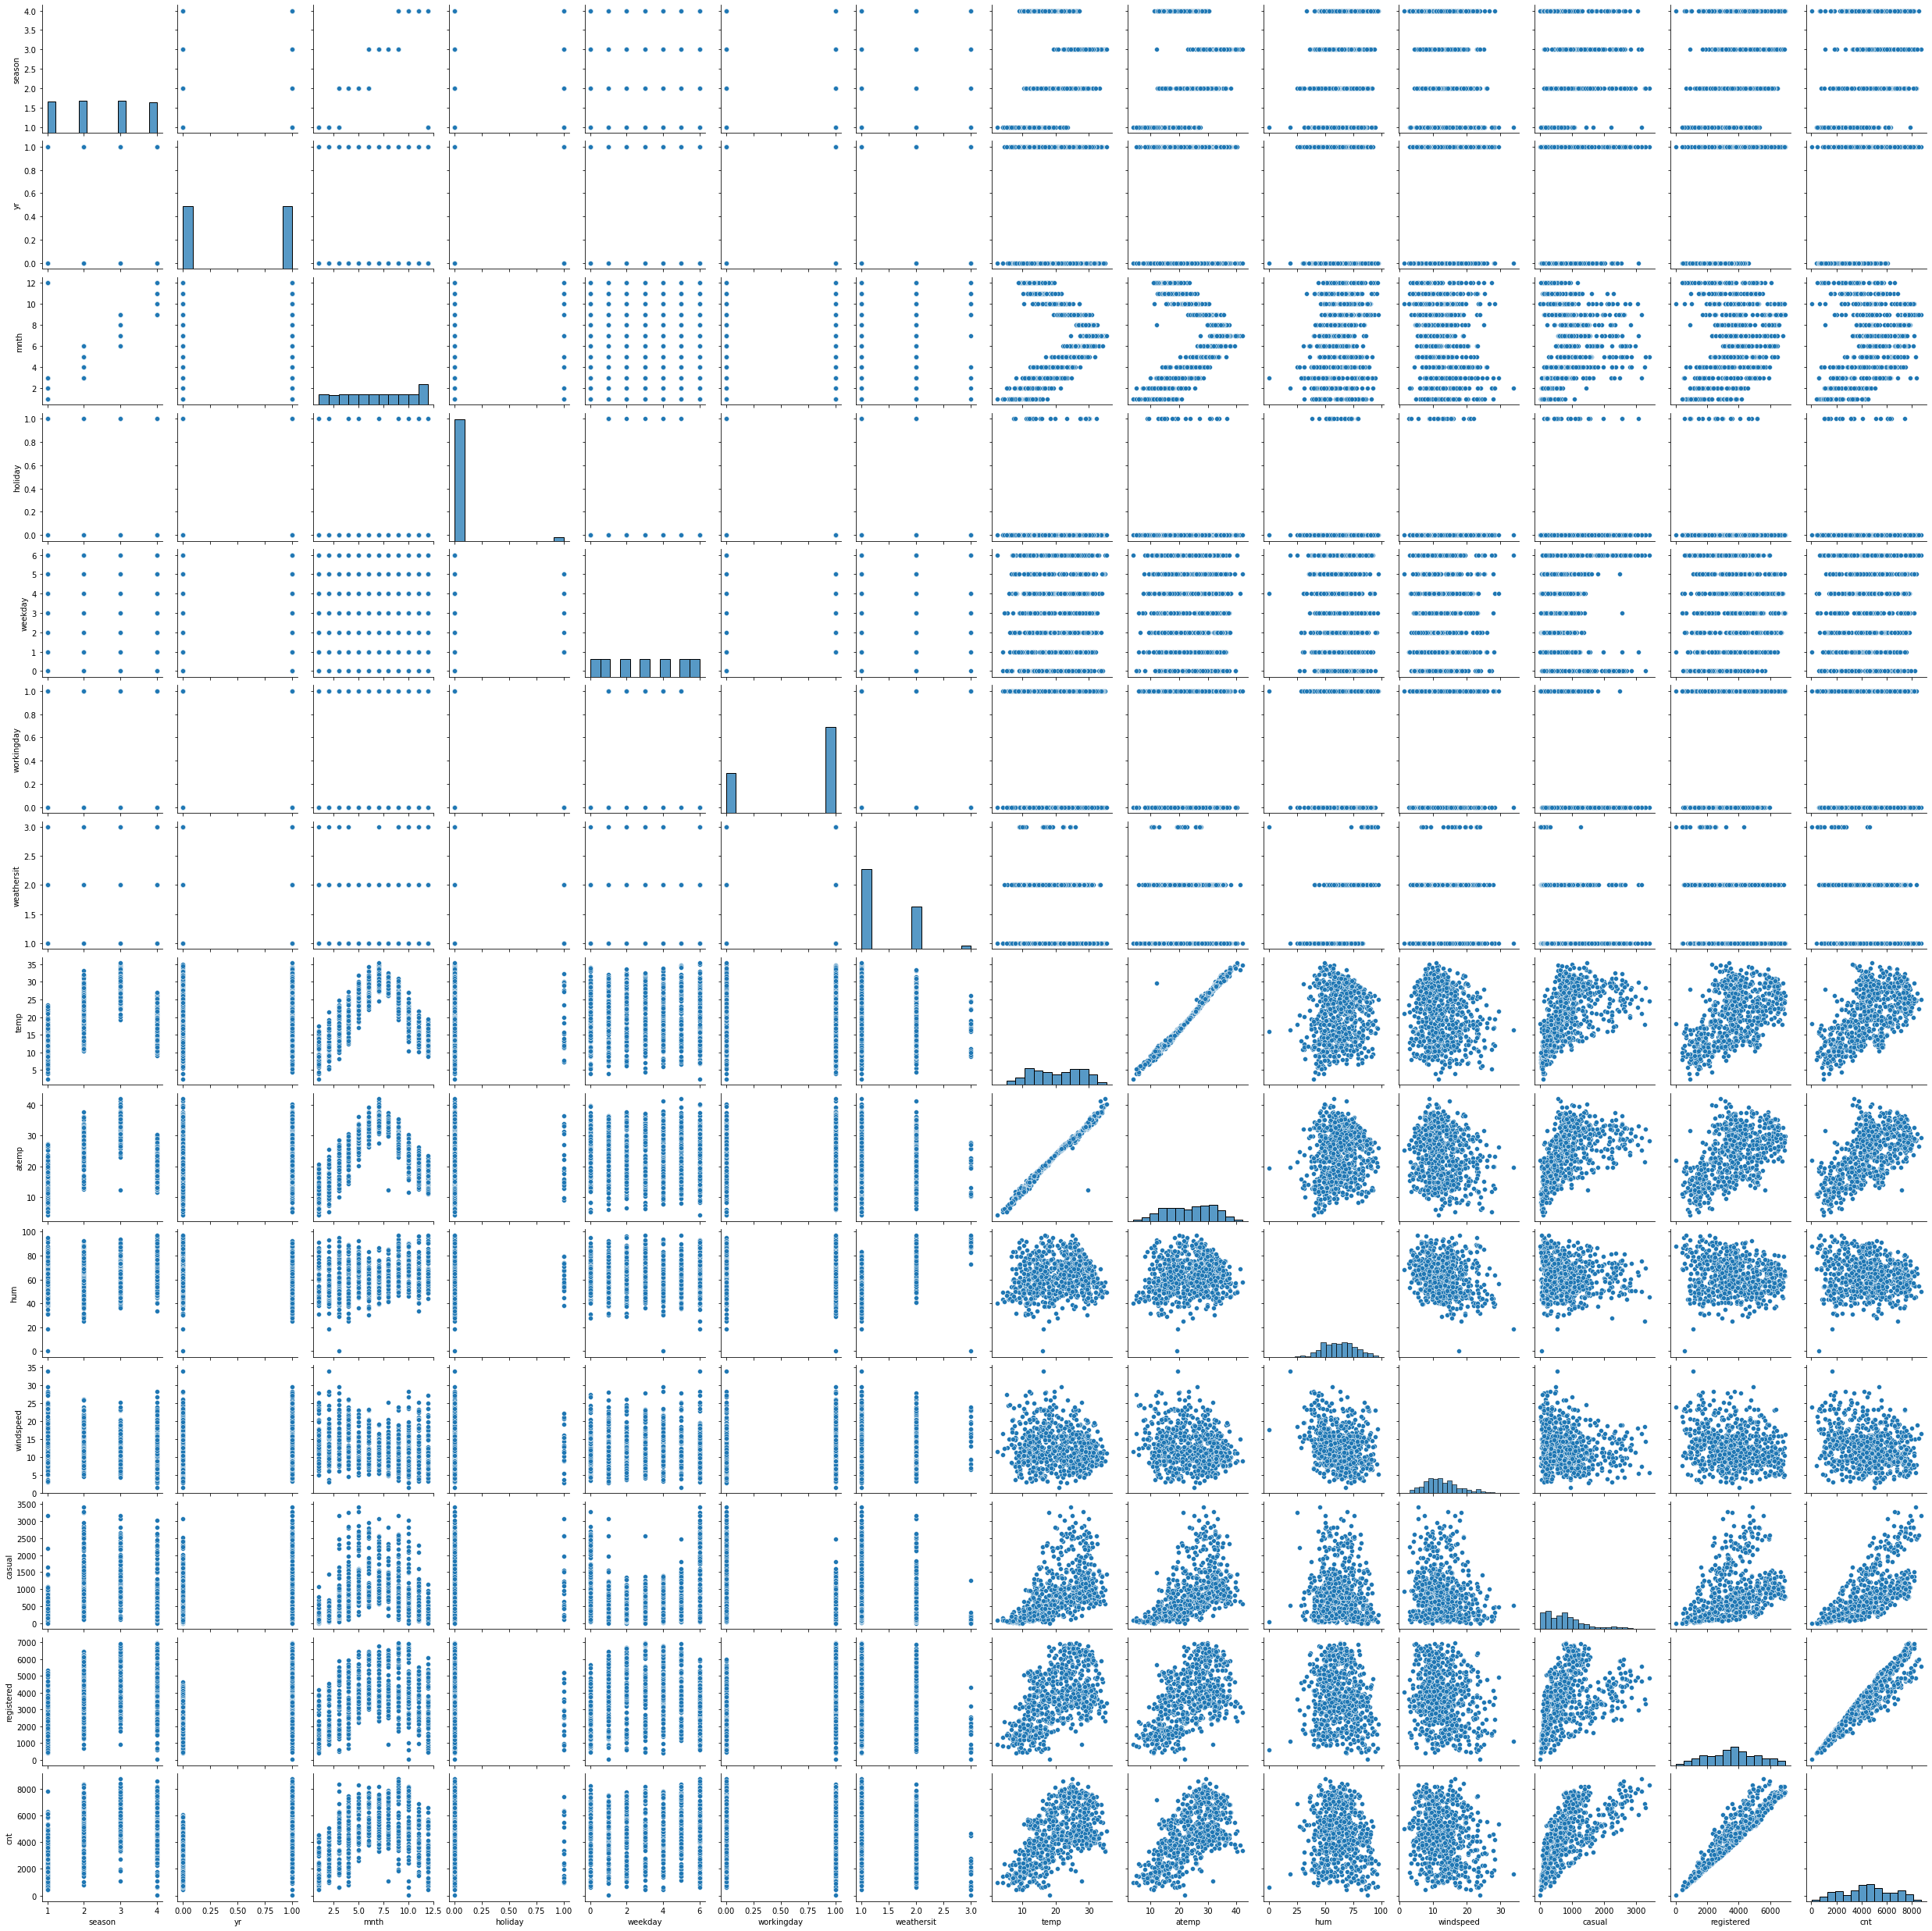

In [7]:
sns.pairplot(bike)

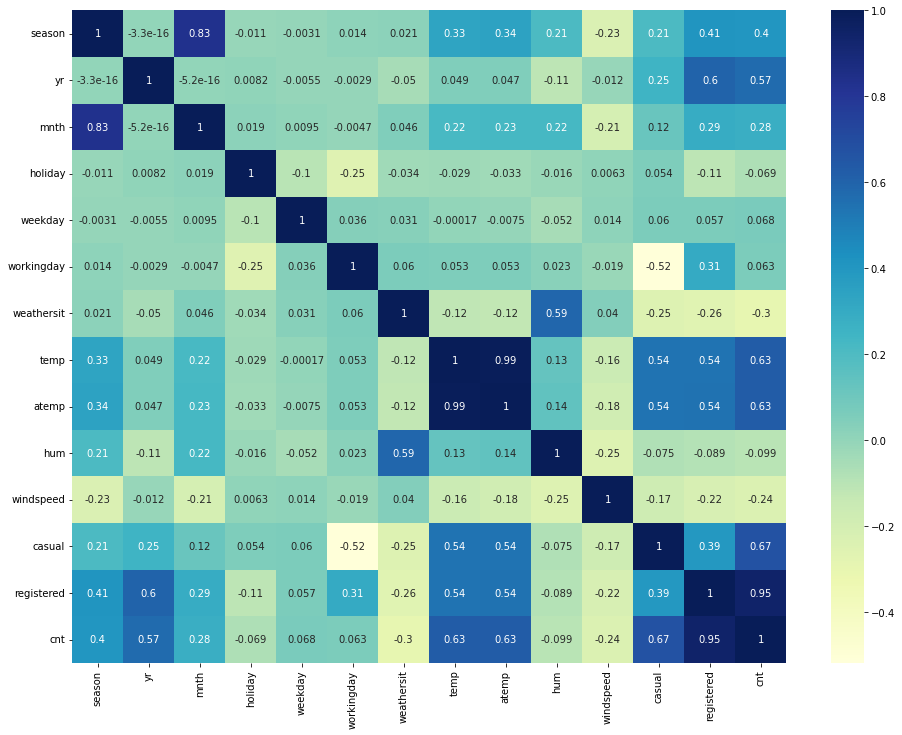

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Step 2: Preparing the Data

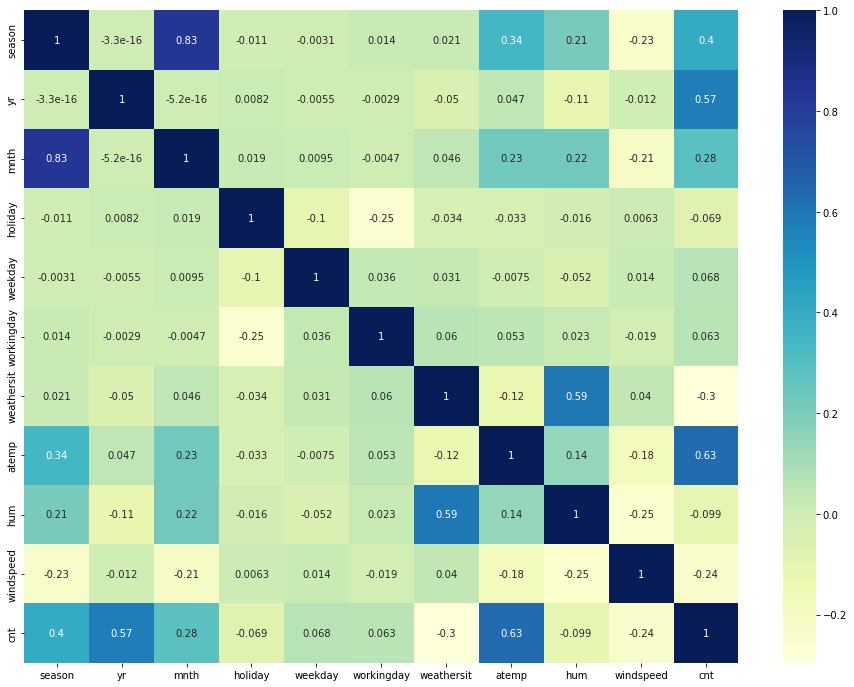

In [9]:
bike = bike.drop(['temp','casual','registered'], axis=1)  # dropping 'temp','casual','registered', because all are highly correlated 
plt.figure(figsize=(16,12))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
bike.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [11]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [13]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
bike.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [15]:
bike.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [16]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [17]:
bike = bike.drop(['dteday'], axis=1)  # It seems that the analysis can be possible by dropping 'dteday'.

In [18]:
bike.shape

(730, 11)

#### Creating Dummy Variables


In [19]:
bike1=bike
bike1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [20]:
# Get the dummy variables for the feature 'season','mnth','weekday' & 'weathersit'.
bike1['season']=bike1['season'].astype('category')
bike1['mnth']=bike1['mnth'].astype('category')
bike1['weekday']=bike1['weekday'].astype('category')
bike1['weathersit']=bike1['weathersit'].astype('category')

#status = pd.get_dummies(bike['season'])#,'mnth','weekday','weathersit'])

# Check what the dataset 'status' looks like
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [21]:
bike1 = pd.get_dummies(bike1,drop_first = True)
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

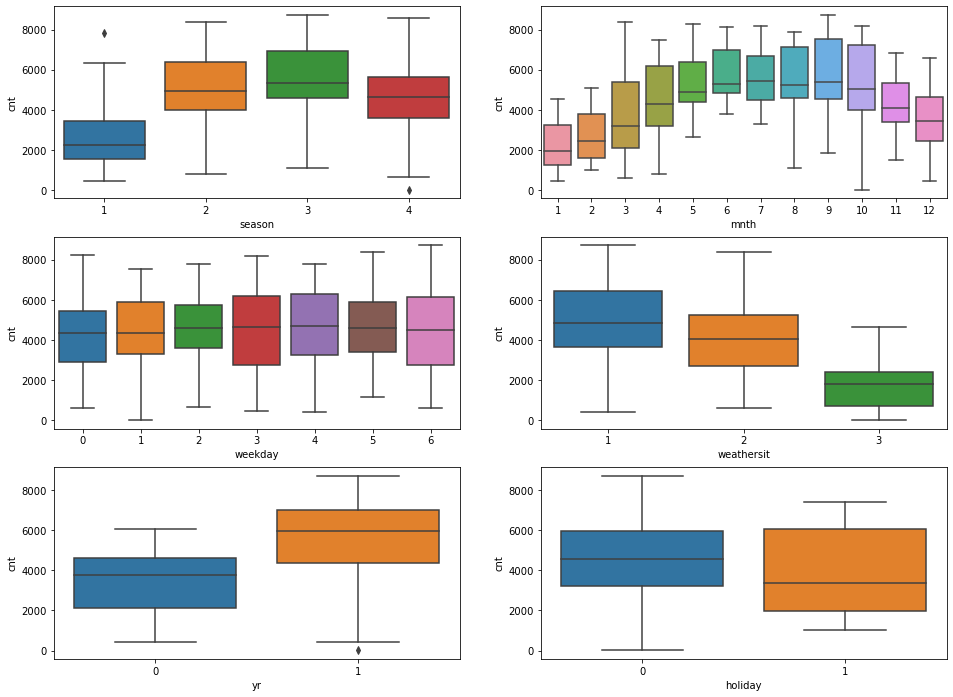

In [22]:
# Statistical overview of categorical variavles on 'cnt' 

plt.figure(figsize=(16,12))

plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(3,2,2)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.subplot(3,2,3)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(3,2,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.subplot(3,2,5)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(3,2,6)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.show()

### Performing Simple Linear Regression

##### Generic Steps in model building using statsmodels

In [23]:
import statsmodels
import statsmodels.api as sm
import sklearn

#### Split into train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
[df_train,df_test ] = train_test_split(bike1, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### Rescaling Features

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,33.1448,70.4167,11.083475,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,16.0977,72.9583,14.707907,1683,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

##### Apply scaler() to all the columns except the 'dummy' variables

In [29]:
num_vars = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1.0,0.0,1.0,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0.0,0.0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,0.0,0.0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0.0,0.0,1.0,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


#### Training The Model 

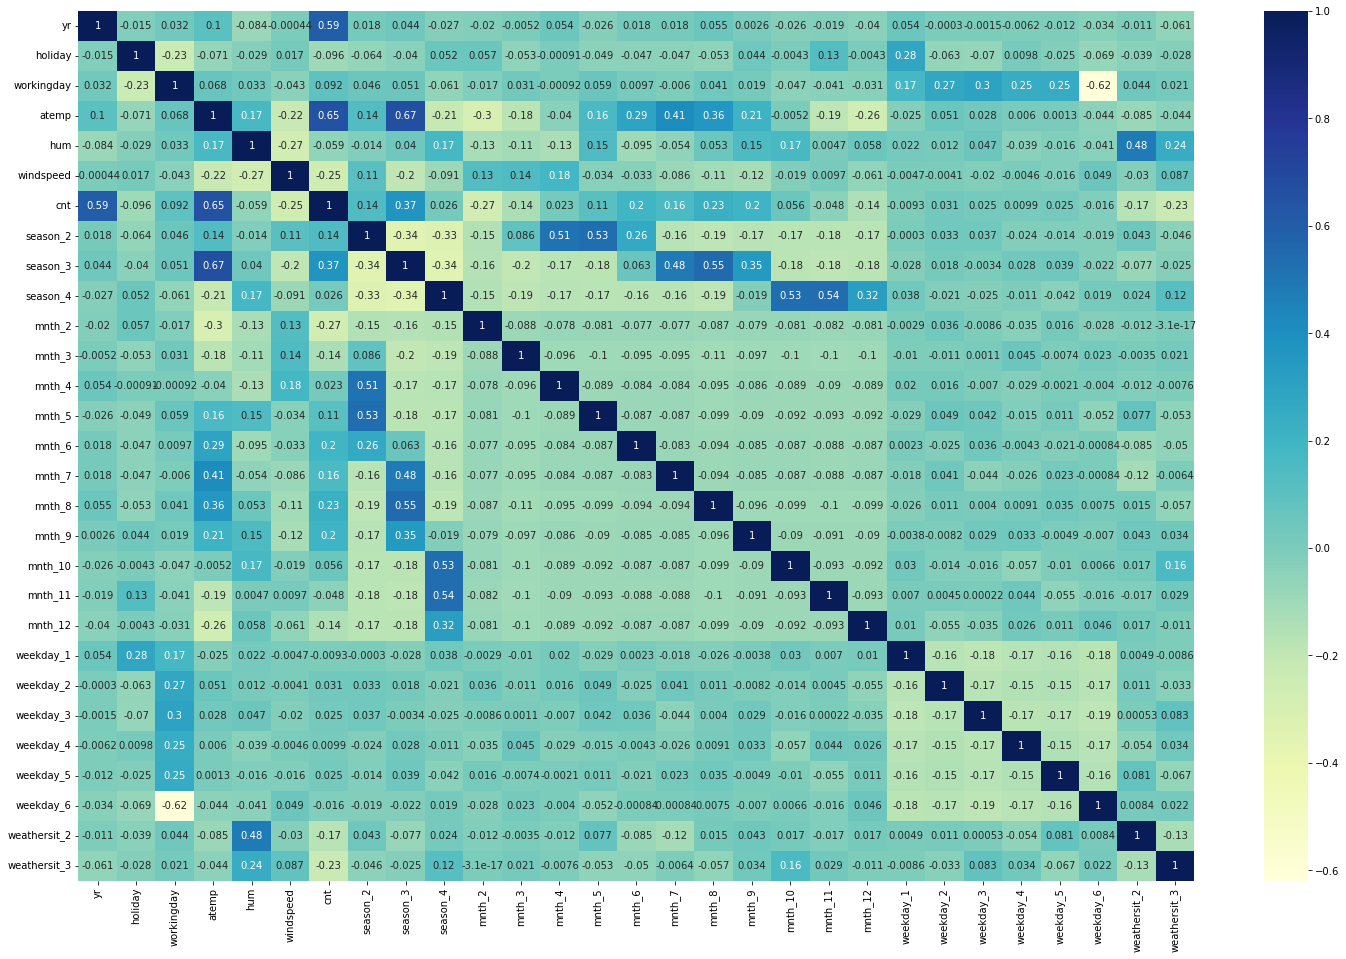

In [30]:
plt.figure(figsize=(25,16))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [31]:
y_train=df_train.pop('cnt')
X_train=df_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1.0,0.0,1.0,0.766351,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,0.0,0.0,0.438975,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,0.0,0.0,0.200348,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.391735,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0.0,0.0,1.0,0.318819,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
X_train.shape

(510, 28)

In [33]:
y_train.shape

(510,)

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 6),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

### Model 1

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### VIF Check

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,22.71
4,hum,17.75
7,season_3,7.67
2,workingday,5.05
5,windspeed,3.85
6,season_2,3.39
8,season_4,2.86
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


In [40]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
lm.params

const           0.193973
yr              0.231449
holiday        -0.050462
workingday      0.044833
atemp           0.493368
hum            -0.162940
windspeed      -0.164353
season_2        0.125615
season_3        0.049741
season_4        0.143452
mnth_8          0.053591
mnth_9          0.116290
mnth_10         0.044127
weekday_6       0.053224
weathersit_2   -0.058670
weathersit_3   -0.246951
dtype: float64

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 18 May 2022   Prob (F-statistic):          2.07e-188
Time:                        13:43:55   Log-Likelihood:                 513.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     494   BIC:                            -926.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1940      0.029      6.656   

 <span style="color:magenta">*Update:* </span>Removing <span style="color:green">*'hum'* for <span style="color:orange"> *high VIF*.<span style="color:blue"> Though, 'atemp' has *highest VIF*, but it seems to be a important parameter for the analysis. So, the second highest VIF is **'hum'**, can be dropped. 

## <span style="color:green"> Model 2

In [42]:
X_train_rfe_new= X_train_rfe.drop(['hum'],axis=1)

<span style="color:green">**VIF Check_2** </span>

In [43]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,15.59
6,season_3,7.31
2,workingday,4.47
4,windspeed,3.64
5,season_2,3.35
7,season_4,2.77
0,yr,2.04
8,mnth_8,1.85
11,weekday_6,1.79
10,mnth_10,1.63


In [44]:
X_train_rfe2 = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model
lm.params

const           0.100204
yr              0.235409
holiday        -0.048725
workingday      0.047868
atemp           0.457663
windspeed      -0.133555
season_2        0.128841
season_3        0.062359
season_4        0.139628
mnth_8          0.047617
mnth_9          0.106645
mnth_10         0.041638
weekday_6       0.058178
weathersit_2   -0.084576
weathersit_3   -0.292012
dtype: float64

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.31e-185
Time:                        13:43:57   Log-Likelihood:                 503.80
No. Observations:                 510   AIC:                            -977.6
Df Residuals:                     495   BIC:                            -914.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1002      0.020      5.078   

 <span style="color:magenta">*Update 2:* </span> Again removing <span style="color:green">*'season_3'* for <span style="color:orange"> *high VIF*<span style="color:blue">. Though, 'atemp' has *highest VIF*, but it seems to be a important parameter for the analysis. So, the second highest VIF is **'season_3'**, can be dropped. 

## <span style="color:red"> Model 3

In [46]:
X_train_rfe_new_new= X_train_rfe_new.drop(['season_3'],axis=1)


In [47]:
X_train_rfe_new2=X_train_rfe_new_new

<span style="color:orange">**VIF Check_3** </span>

In [48]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,6.31
2,workingday,4.43
4,windspeed,3.56
0,yr,2.02
6,season_4,2.00
5,season_2,1.84
10,weekday_6,1.78
9,mnth_10,1.60
7,mnth_8,1.56
11,weathersit_2,1.55


In [49]:
X_train_rfe3 = sm.add_constant(X_train_rfe_new2)
lm = sm.OLS(y_train,X_train_rfe3).fit()   # Running the linear model
lm.params

const           0.090513
yr              0.233944
holiday        -0.050762
workingday      0.047577
atemp           0.529772
windspeed      -0.135458
season_2        0.099728
season_4        0.120626
mnth_8          0.067620
mnth_9          0.123099
mnth_10         0.034796
weekday_6       0.057786
weathersit_2   -0.085106
weathersit_3   -0.287295
dtype: float64

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 18 May 2022   Prob (F-statistic):          5.49e-185
Time:                        13:43:58   Log-Likelihood:                 499.57
No. Observations:                 510   AIC:                            -971.1
Df Residuals:                     496   BIC:                            -911.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0905      0.020      4.621   

<span style="color:red">*Update 3:* </span> Removing <span style="color:blue">*'holiday'*</span> for <span style="color:green"> *high VIF*.

## <span style="color:magenta"> Model 4

In [51]:
X_train_rfe_new3= X_train_rfe_new2.drop(['holiday'],axis=1)

<span style="color:cyan">**VIF Check_4** </span>

In [52]:
vif = pd.DataFrame()
X = X_train_rfe_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.19
1,workingday,4.10
3,windspeed,3.45
0,yr,2.02
5,season_4,1.98
4,season_2,1.84
9,weekday_6,1.70
8,mnth_10,1.60
6,mnth_8,1.55
10,weathersit_2,1.54


In [53]:
X_train_rfe4 = sm.add_constant(X_train_rfe_new3)
lm = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.92e-185
Time:                        13:43:59   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     497   BIC:                            -914.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0820      0.019      4.302   

<span style="color:red">*Update 4:* </span> Removing <span style="color:blue">*'mnth_10'*</span> for <span style="color:green"> *high P value*.

## <span style="color:blue"> Model 5

In [54]:
X_train_rfe_new4= X_train_rfe_new3.drop(['mnth_10'],axis=1)

<span style="color:black">**VIF Check_5** </span>

In [55]:
vif = pd.DataFrame()
X = X_train_rfe_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,season_2,1.83
8,weekday_6,1.69
6,mnth_8,1.55
9,weathersit_2,1.54
5,season_4,1.52
7,mnth_9,1.30


In [56]:
X_train_rfe5 = sm.add_constant(X_train_rfe_new4)
lm = sm.OLS(y_train,X_train_rfe5)# Running the linear model
lm_model=lm.fit()
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 18 May 2022   Prob (F-statistic):          9.15e-186
Time:                        13:44:00   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0779      0.019      4.098   

In [75]:
lm_model.params


const           0.077912
yr              0.233696
workingday      0.054355
atemp           0.540858
windspeed      -0.133705
season_2        0.098699
season_4        0.131978
mnth_8          0.064985
mnth_9          0.116346
weekday_6       0.064770
weathersit_2   -0.083696
weathersit_3   -0.280195
dtype: float64

<span style="color:blue"> *Still the VIF of 'atemp' > 5.0. But feeling temparature is important for bike renting. therefore, the variable has not been dropped.* 

<span style="color:red"> **Based on the Model 5 coefficients.** 

**cnt=  0.077912 + 0.233696 * yr + 0.054355 * workingday + 0.540858 * atemp - 0.133705 * windspeed + 0.098699 * season_2 + 0.131978 * season_4 + 0.064985 * mnth_8 +  0.116346 * mnth_9 + 0.064770 * weekday_6 - 0.083696 * weathersit_2 - 0.280195 * weathersit_3**

### Step3: Residul Analysis

In [58]:
y_train_pred = lm_model.predict(X_train_rfe5)


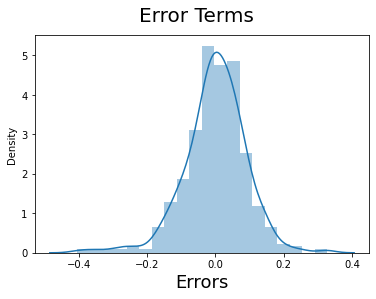

In [59]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

In the figure above, the distribution is a normal distribution. Therefore the linear regrassion is valid. 

## Prediction and evaluating the Test sets

In [60]:
num_vars = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0.0,1.0,0.0,0.778767,0.534223,0.149393,0.704300,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,0.0,1.0,0.855132,0.470417,0.231142,0.725421,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0.0,0.0,1.0,0.492359,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0.0,0.0,1.0,0.805661,0.236659,0.449707,0.545512,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0.0,0.0,1.0,0.749249,0.070765,0.682387,0.569148,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.530791,0.508362,0.418803,0.517923,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.227648,0.200875,0.187683,0.239498,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.719758,0.650989,0.523975,0.687956,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
y_test=df_test.pop('cnt')
X_test=df_test

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_new4.columns]

In [64]:
X_test_new.shape

(220, 11)

In [65]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_pred = lm_model.predict(X_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

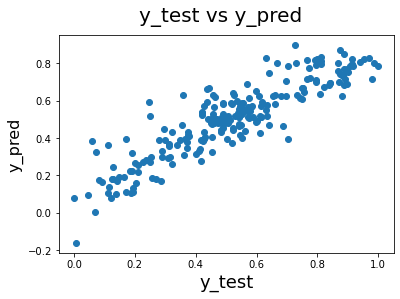

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

<span style="color:blue"> **R^2 Value** </span> for Validation

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


r2_train=r2_score(y_true=y_train, y_pred=y_train_pred)
print('Train r2_score is: ', r2_train)

r2_test=r2_score(y_true=y_test, y_pred=y_pred)
print('Test r2_score is: ', r2_test)

Train r2_score is:  0.8333479779630562
Test r2_score is:  0.7920903006573212


**Result:** <span style="color:blue"> Train r2_score is:  0.8333479779630562 </span> & <span style="color:green"> Test r2_score is:  0.7920903006573212.

### The Final equation is 

**cnt=  0.077912 + (0.233696 * year) + (0.054355 * workingday) + (0.540858 * atemp) - (0.133705 * windspeed) + (0.098699 * summer) + (0.131978 * winter) + (0.064985 * month 8) +  (0.116346 * month 9) + (0.064770 * day of the week 6) - (0.083696 * (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)) - (0.280195 * (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds))**

In [78]:
lm_model.params.sort_values(ascending=False) # most contributed features

atemp           0.540858
yr              0.233696
season_4        0.131978
mnth_9          0.116346
season_2        0.098699
const           0.077912
mnth_8          0.064985
weekday_6       0.064770
workingday      0.054355
weathersit_2   -0.083696
windspeed      -0.133705
weathersit_3   -0.280195
dtype: float64